In [20]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline

Cobaaja.csv berisi dataset yang sudah balance tapi belum dicleaning ulang datanya sebanyak 600 data

In [21]:
import pandas as pd
datafix=pd.read_csv('cobaaja.csv',sep=';')

In [22]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [23]:
datafix['length'] = datafix['tweet'].apply(length)
datafix.head(10)

,tweet,sentiment,length
0,sekolah online bikin senang,positive,27
1,sekolah online semangat,positive,23
2,lancar sekolah online,positive,21
3,selamat pagi sekolah ajar online kerja semanga...,positive,50
4,sekolah online asik,positive,19
5,sistem tatap muka pandemi warga sekolah taat p...,positive,59
6,sehat semangat sekolah online,positive,29
7,memang sudah fleksibel online class enak,positive,40
8,sekolah daring bagus tim ajar modul rekam vide...,positive,59
9,pemerintah sadar sekolah online efektif percay...,positive,59


In [24]:
POS_data = datafix[datafix['sentiment'] == 'positive']
NEG_data = datafix[datafix['sentiment'] == 'negative']
NET_data = datafix[datafix['sentiment'] == 'neutral']

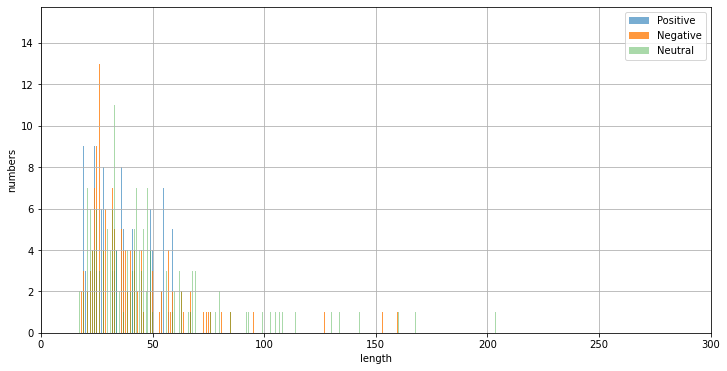

In [25]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(POS_data['length'], alpha = 0.6, bins=bins, label='Positive')
plt.hist(NEG_data['length'], alpha = 0.8, bins=bins, label='Negative')
plt.hist(NET_data['length'], alpha = 0.4, bins=bins, label='Neutral')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.savefig('hubungan.png')
plt.show()

Liatduludeh.csv berisi dataset yang sudah balance dan sudah dicleaning ulang untuk dianalisis persebaran katanya

In [26]:
import pandas as pd
datafix=pd.read_csv('liatduludeh.csv',sep=';')

In [27]:
datafix['tweet'] = datafix['tweet'].str.lower()
stop = {'sekolah','online','daring','school','from','home','banget','tidak','jadi','kalau','bikin','tapi','buat','adik','murid','guru','orang','siswa','adek','biar','emang','pagi','sore','malam','siang','gini','engga','kalau','mungkin','pengen','asli','ngerasa','lain','melulu','alias','puter','yang','jadi','akibat','maka','lebih','lain','tetep','gamau','udah','pakai','gitu','adekku','adeknya','terima','systems','kayak','style','lomba','ayam','kakak','sama','class','ajar','anak','internet','wifi','pandemi','tugas','offline','protokol','kuota','teknologi','pelajaran','aspek','gaperlu','mandi','terap','teman','titik','baca','ulang','keliatan','ebook','resiko','kuliah','seneng','impian','rumah','catat','materi','ulang','buku','bangun','pikir','ngetik','semester','jadwal','adaptasi','penuh','sepenuh','hati','zoom','pakai','sumpah','selesai','kelas','masuk','minim','suka','kuat','jadwal','sistem','tatap','muka','warga','modul','kerja','video','pemerintah','sadar','percaya','temu','solusi','rekam','didik','sekolah','jalan','fasilitas','beda','daerah','sepakat','kalo','ulangan','open','book','Sekolah','ponakan','matematika','nilai','orangtua','math','science','lihat','senin','selasa','rabu','kamis','jumat','sabtu','jum\'at','minggu','zona','hijau','lupa','sarapan','kuning','program','kemdikbud','kemendikbud','ilmu','moga','semoga','lalu','gopay','saldo','beli','generasi','mood','belajar'}
datafix['tweet'] = datafix['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop) and len(word)>=4]))
stop = stopwords.words('indonesian')
datafix['tweet'] = datafix['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [28]:
# extracting the number of examples of each class
POS_len = datafix[datafix['sentiment'] == 'positive'].shape[0]
NEG_len = datafix[datafix['sentiment'] == 'negative'].shape[0]
NET_len = datafix[datafix['sentiment'] == 'neutral'].shape[0]

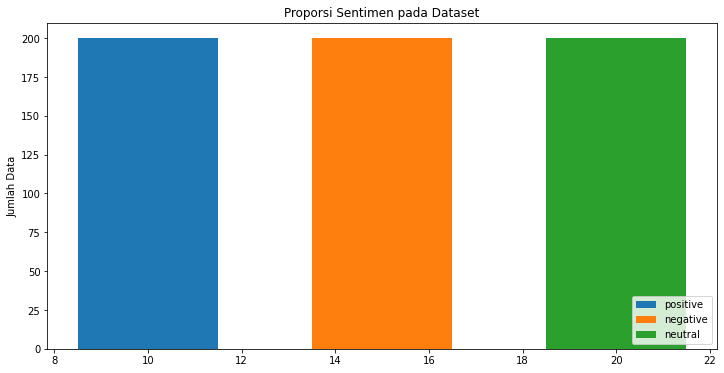

In [44]:
# bar plot of the 3 classes
from matplotlib import pyplot as plt
plt.bar(10,POS_len,3, label="positive")
plt.bar(15,NEG_len,3, label="negative")
plt.bar(20,NET_len,3, label="neutral")
plt.legend(loc='lower right')
plt.ylabel('Jumlah Data')
plt.title('Proporsi Sentimen pada Dataset')
plt.savefig('barchart.png',bbox_inches='tight')
plt.show()

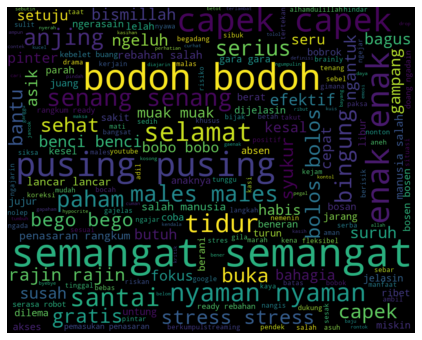

In [43]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [str (twts) for twts in datafix['tweet']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.savefig('wordcloud.png',bbox_inches='tight')
plt.show()

In [31]:
a = datafix['tweet'] == ''
datafix[a].count()

tweet        0
sentiment    0
dtype: int64

In [32]:
POS_data = datafix[datafix['sentiment'] == 'positive']
NEG_data = datafix[datafix['sentiment'] == 'negative']
NET_data = datafix[datafix['sentiment'] == 'neutral']

In [33]:
from collections import defaultdict
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

# Unigrams
positive_unigrams = defaultdict(int)

for tweet in POS_data['tweet']:
    for word in generate_ngrams(tweet):
        positive_unigrams[word] += 1
         
df_top_positive = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive = df_top_positive.rename(columns={0:'Word',1:'Count'})

# Bigrams
positive_bigrams = defaultdict(int)

for tweet in POS_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=2):
        positive_bigrams[word] += 1
        
df_top_positive_bi = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive_bi = df_top_positive_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
positive_trigrams = defaultdict(int)

for tweet in POS_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=3):
        positive_trigrams[word] += 1
        
df_top_positive_tri = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive_tri = df_top_positive_tri.rename(columns={0:'Word',1:'Count'})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


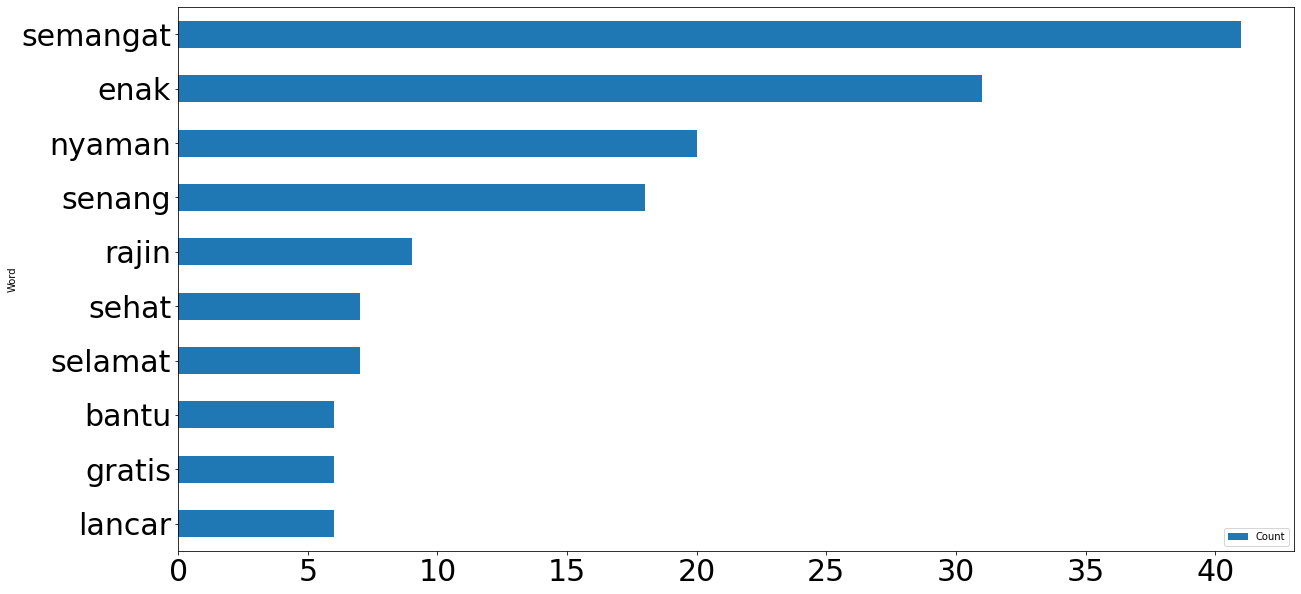

In [34]:
df_top_positive.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('haha.png',bbox_inches='tight')

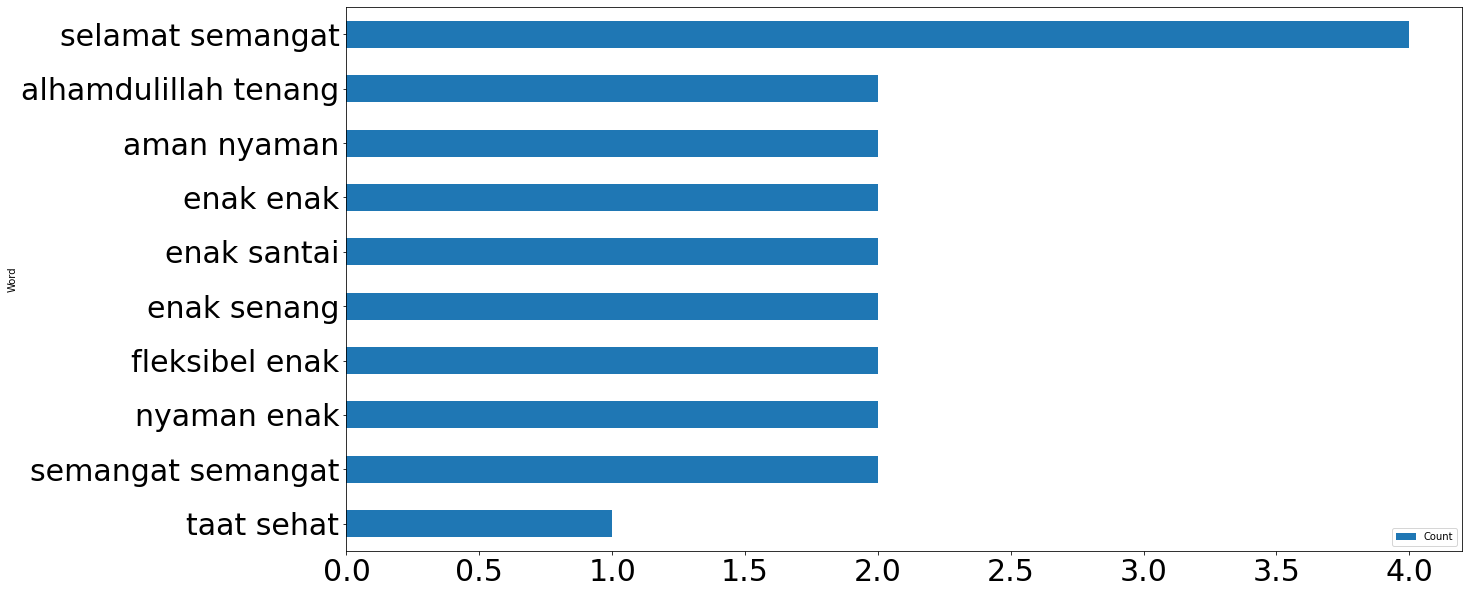

In [35]:
df_top_positive_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('haha1.png',bbox_inches='tight')

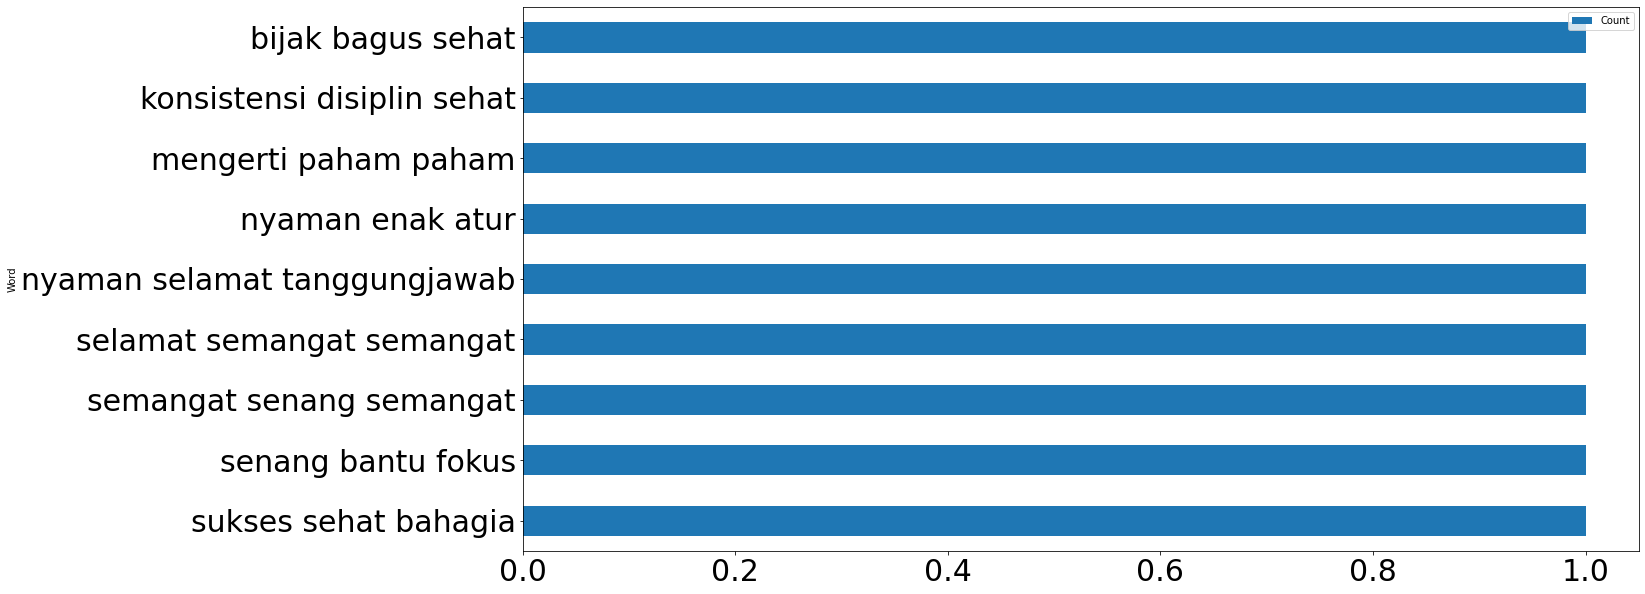

In [37]:
df_top_positive_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('haha2.png',bbox_inches='tight')

Negative

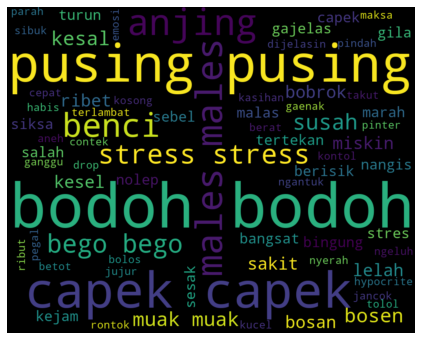

In [38]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [twts for twts in NEG_data['tweet']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [39]:
# Unigrams
negative_unigrams = defaultdict(int)

for tweet in NEG_data['tweet']:
    for word in generate_ngrams(tweet):
        negative_unigrams[word] += 1
         
df_top_negative = pd.DataFrame(sorted(negative_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative = df_top_negative.rename(columns={0:'Word',1:'Count'})

# Bigrams
negative_bigrams = defaultdict(int)

for tweet in NEG_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=2):
        negative_bigrams[word] += 1
        
df_top_negative_bi = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative_bi = df_top_negative_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
negative_trigrams = defaultdict(int)

for tweet in NEG_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=3):
        negative_trigrams[word] += 1
        
df_top_negative_tri = pd.DataFrame(sorted(negative_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative_tri = df_top_negative_tri.rename(columns={0:'Word',1:'Count'})


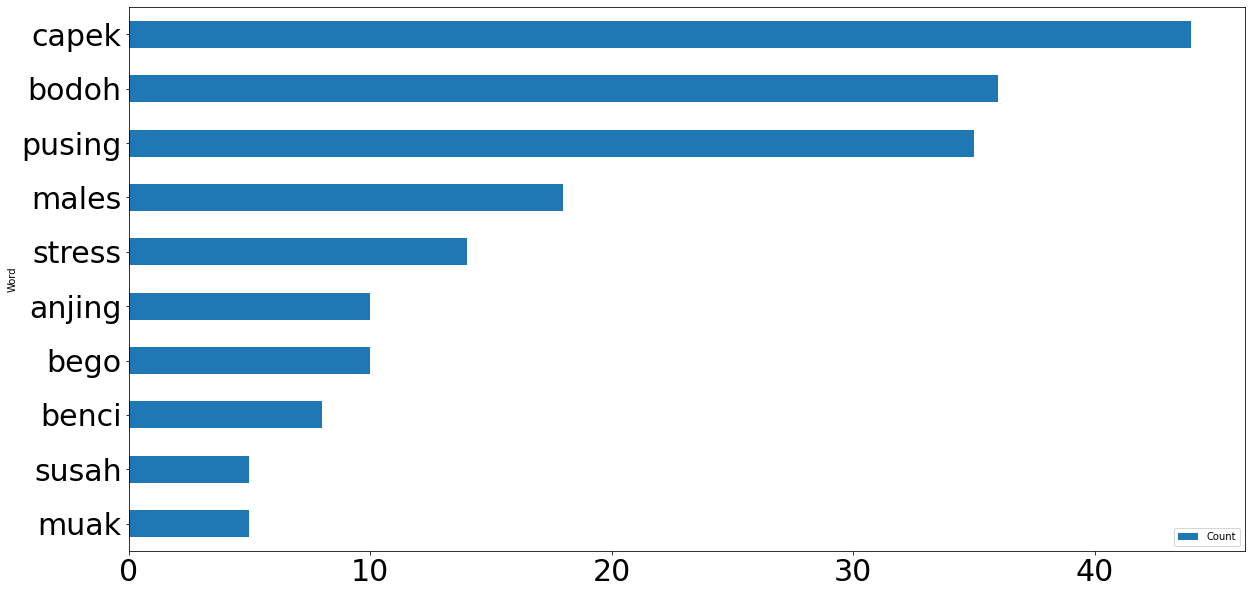

In [40]:
df_top_negative.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('hihi.png',bbox_inches='tight')

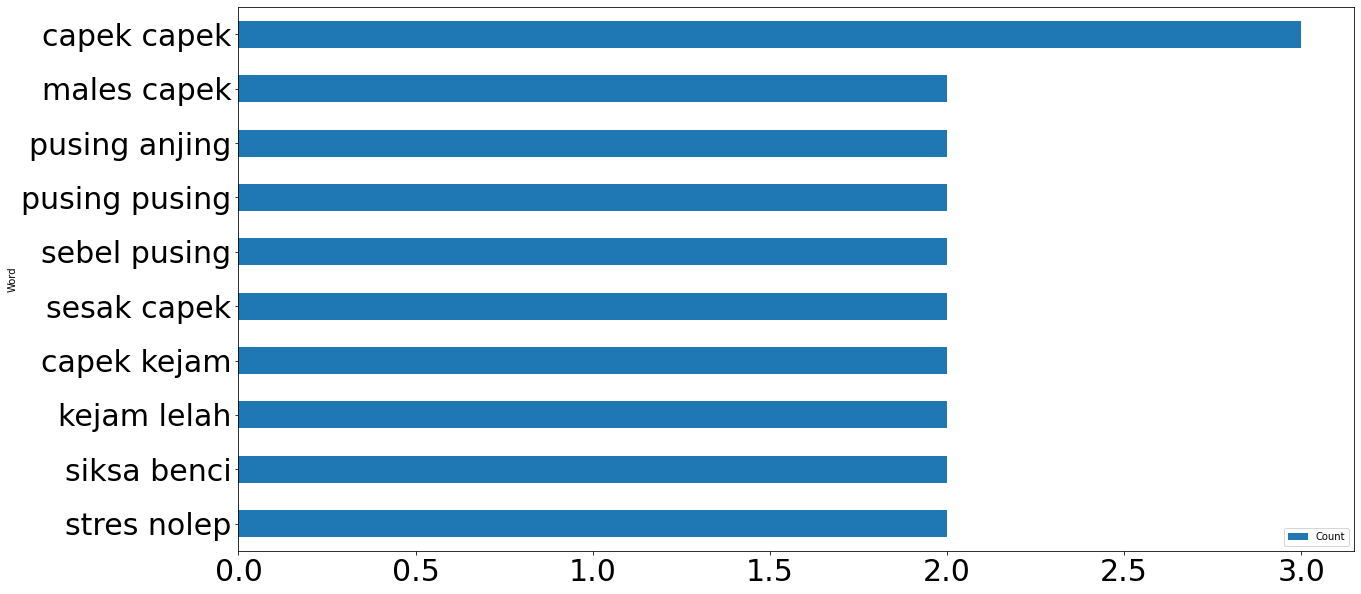

In [41]:
df_top_negative_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('hihi1.png',bbox_inches='tight')

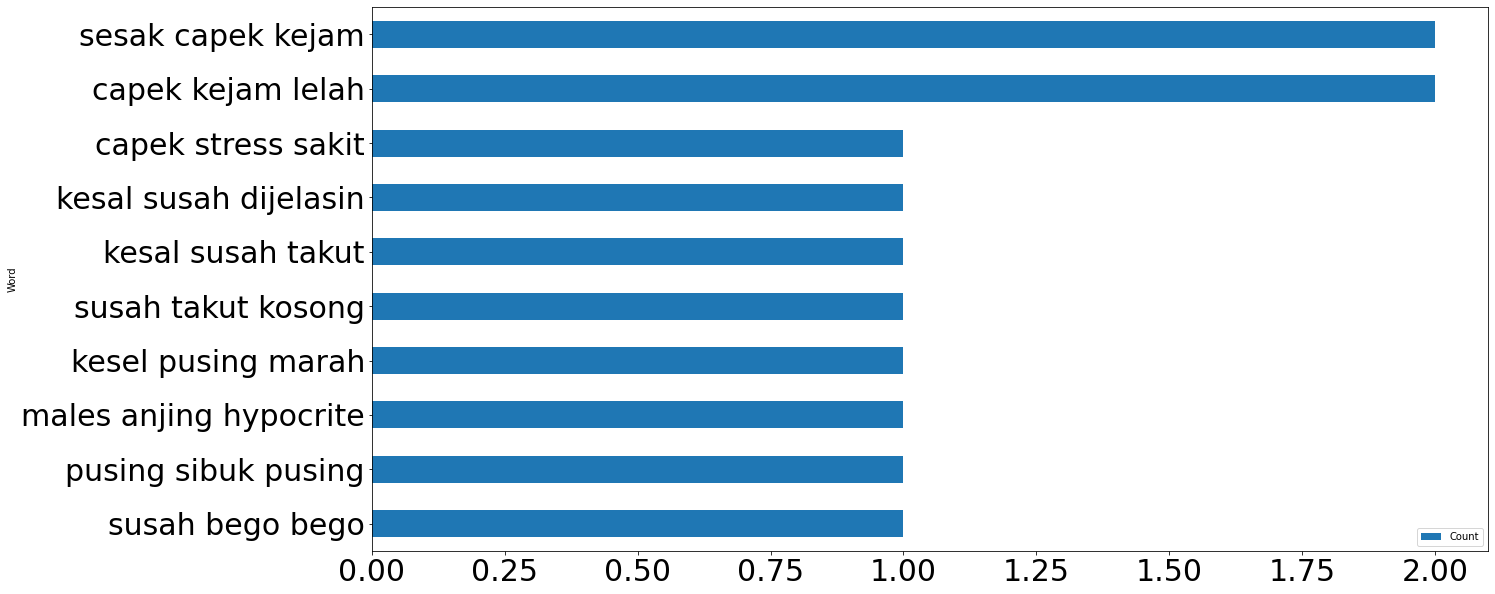

In [42]:
df_top_negative_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('hihi2.png',bbox_inches='tight')

Netral

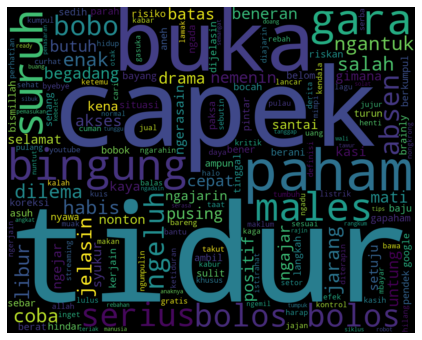

In [220]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [twts for twts in NET_data['tweet']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [221]:
# Unigrams
neutral_unigrams = defaultdict(int)

for tweet in NET_data['tweet']:
    for word in generate_ngrams(tweet):
        neutral_unigrams[word] += 1
         
df_top_neutral = pd.DataFrame(sorted(neutral_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral = df_top_neutral.rename(columns={0:'Word',1:'Count'})

# Bigrams
neutral_bigrams = defaultdict(int)

for tweet in NET_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=2):
        neutral_bigrams[word] += 1
        
df_top_neutral_bi = pd.DataFrame(sorted(neutral_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral_bi = df_top_neutral_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
neutral_trigrams = defaultdict(int)

for tweet in NET_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=3):
        neutral_trigrams[word] += 1
        
df_top_neutral_tri = pd.DataFrame(sorted(neutral_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral_tri = df_top_neutral_tri.rename(columns={0:'Word',1:'Count'})


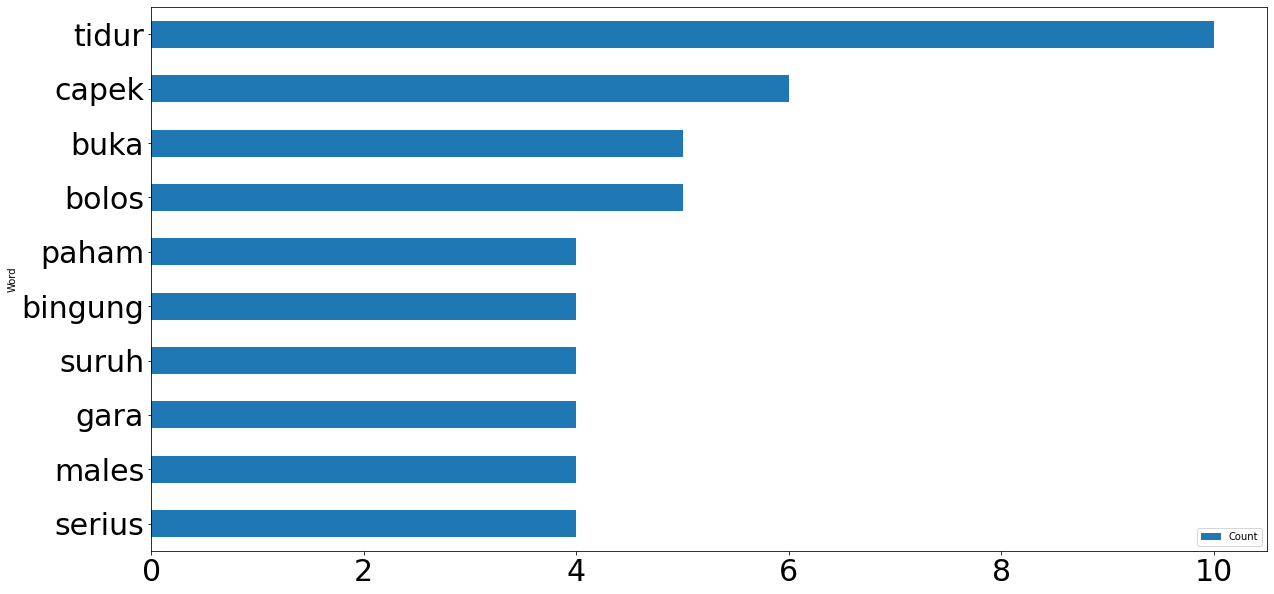

In [222]:
df_top_neutral.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('huhu.png',bbox_inches='tight')

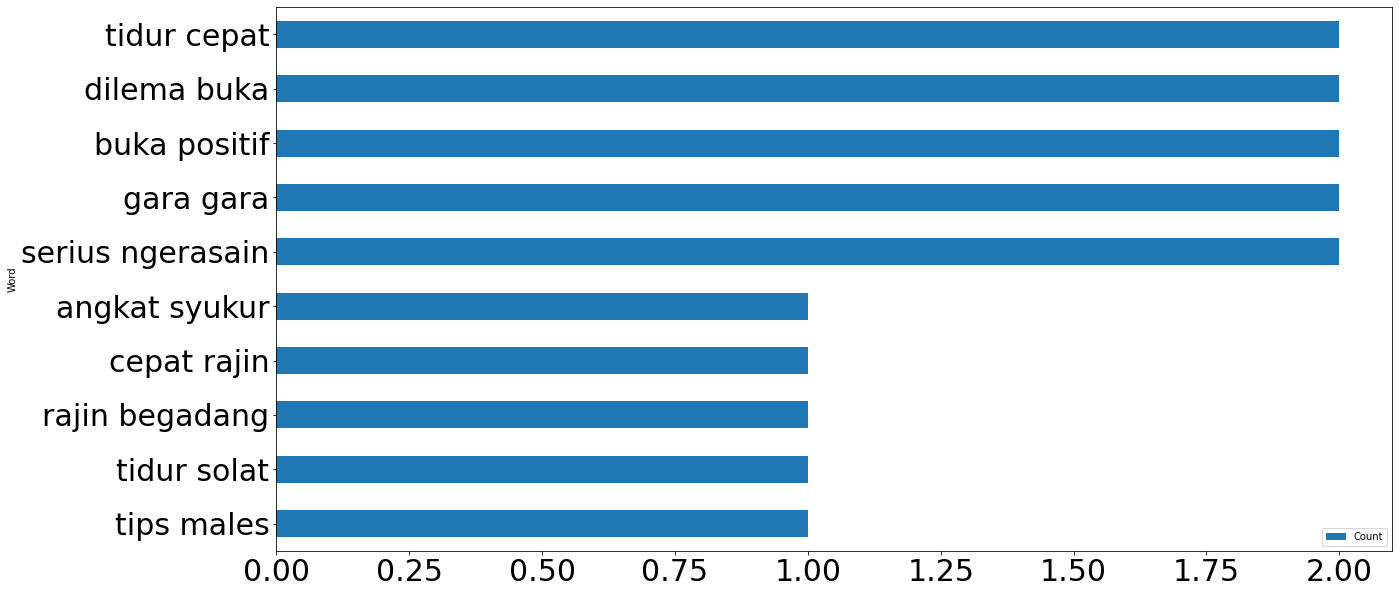

In [223]:
df_top_neutral_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('huhu1.png',bbox_inches='tight')

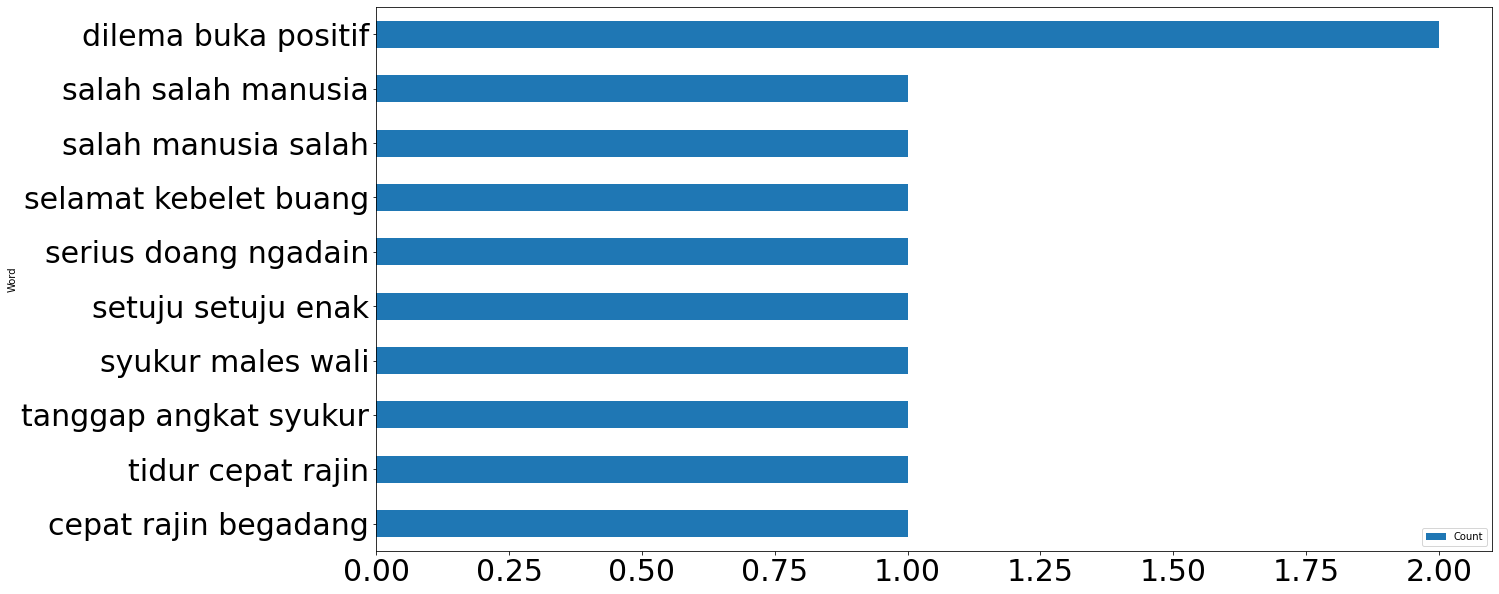

In [224]:
df_top_neutral_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('huhu2.png',bbox_inches='tight')